/Users/augustestriogaite/Downloads/Class_imbalance_MLP-main/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/augustestriogaite/Downloads/Class_imbalance_MLP-main/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/augustestriogaite/Downloads/Class_imbalance_MLP-main/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/augustestriogaite/Downloads/Class_imbalance_MLP-main/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691:

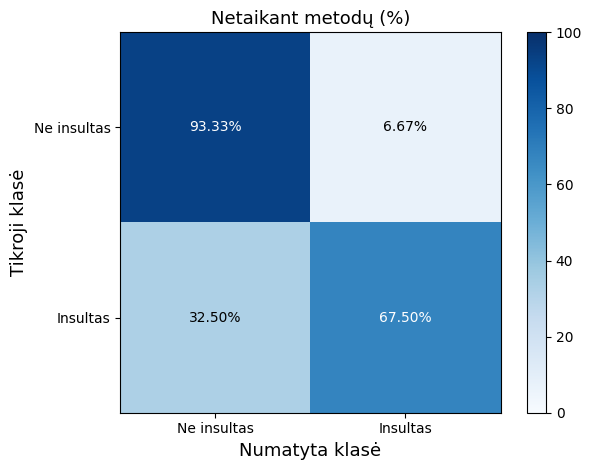

In [1]:
# Kryžminė validacija naudojant tik MLP ir kryžminę validaciją
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, confusion_matrix

df = pd.read_csv('dataset_heart_reduced.csv', encoding='utf-8-sig')

X = df.drop(columns=['Širdies liga'])
y = df['Širdies liga']

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

f1_scores = []
confusion_matrices = []

for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=7)
    mlp.fit(X_train_scaled, y_train)

    test_preds = mlp.predict(X_test_scaled)
    f1_scores.append(f1_score(y_test, test_preds))
    cm = confusion_matrix(y_test, test_preds)
    confusion_matrices.append(cm)

mean_cm = np.mean(confusion_matrices, axis=0)
cm_percentage = mean_cm.astype('float') / mean_cm.sum(axis=1)[:, np.newaxis] * 100

fig, ax = plt.subplots()
cax = ax.matshow(cm_percentage, cmap=plt.cm.Blues, vmin=0, vmax=100)
plt.title('Netaikant metodų (%)', fontsize=13)
fig.colorbar(cax)

ax.set_xticks(np.arange(2))
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Ne insultas', 'Insultas'], fontsize=10)
ax.set_yticklabels(['Ne insultas', 'Insultas'], fontsize=10)
ax.xaxis.set_ticks_position('bottom')

for (i, j), val in np.ndenumerate(cm_percentage):
    text_color = 'white' if val > 50 else 'black'
    ax.text(j, i, f'{val:.2f}%', ha='center', va='center', color=text_color, fontsize=10)

plt.xlabel("Numatyta klasė", fontsize=13)
plt.ylabel("Tikroji klasė", fontsize=13)
plt.tight_layout()
#plt.savefig("heart_mlp_only.png", dpi=300, bbox_inches='tight')
plt.show()


/Users/augustestriogaite/Downloads/Class_imbalance_MLP-main/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/augustestriogaite/Downloads/Class_imbalance_MLP-main/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/augustestriogaite/Downloads/Class_imbalance_MLP-main/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/augustestriogaite/Downloads/Class_imbalance_MLP-main/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691:

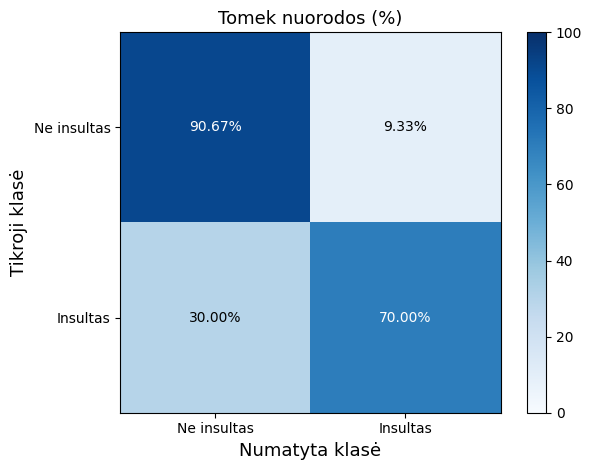

In [2]:
# Kryžminė validacija naudojant tik Tomek nuorodas ir kryžminę validaciją
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from imblearn.under_sampling import TomekLinks
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt

df = pd.read_csv('dataset_heart_reduced.csv', encoding='utf-8-sig')

X = df.drop(columns=['Širdies liga'])
y = df['Širdies liga']

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

f1_scores = []
confusion_matrices = []

for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    tl = TomekLinks()
    X_train_resampled, y_train_resampled = tl.fit_resample(X_train, y_train)

    scaler = StandardScaler()
    X_train_resampled = scaler.fit_transform(X_train_resampled)
    X_test_scaled = scaler.transform(X_test)

    mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=7)
    mlp.fit(X_train_resampled, y_train_resampled)

    test_preds = mlp.predict(X_test_scaled)

    f1_scores.append(f1_score(y_test, test_preds))
    cm = confusion_matrix(y_test, test_preds)
    confusion_matrices.append(cm)

mean_cm = np.mean(confusion_matrices, axis=0)
cm_percentage = mean_cm.astype('float') / mean_cm.sum(axis=1)[:, np.newaxis] * 100

fig, ax = plt.subplots()
cax = ax.matshow(cm_percentage, cmap=plt.cm.Blues, vmin=0, vmax=100)
plt.title('Tomek nuorodos (%)', fontsize=13)
fig.colorbar(cax)

ax.set_xticks(np.arange(2))
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Ne insultas', 'Insultas'], fontsize=10)
ax.set_yticklabels(['Ne insultas', 'Insultas'], fontsize=10)
ax.xaxis.set_ticks_position('bottom')

for (i, j), val in np.ndenumerate(cm_percentage):
    color = 'white' if val > 50 else 'black'
    ax.text(j, i, f'{val:.2f}%', ha='center', va='center', color=color, fontsize=10)

plt.xlabel("Numatyta klasė", fontsize=13)
plt.ylabel("Tikroji klasė", fontsize=13)
plt.tight_layout()
# plt.savefig("heart_tomek_cross.png", dpi=300, bbox_inches='tight')
plt.show()


/Users/augustestriogaite/Downloads/Class_imbalance_MLP-main/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/augustestriogaite/Downloads/Class_imbalance_MLP-main/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/augustestriogaite/Downloads/Class_imbalance_MLP-main/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/augustestriogaite/Downloads/Class_imbalance_MLP-main/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691:

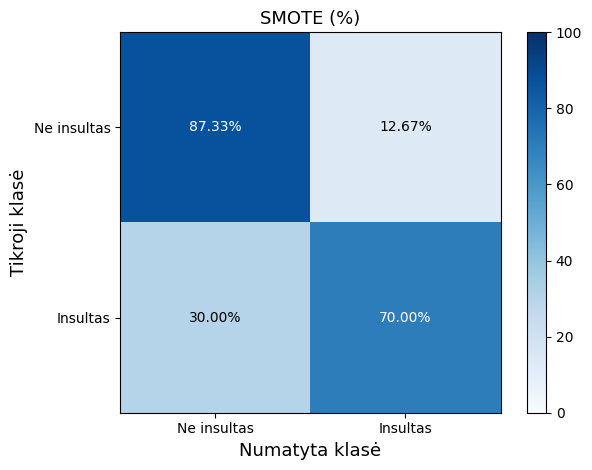

In [3]:
# Kryžminė validacija naudojant tik SMOTE ir kryžminę validaciją

import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
df = pd.read_csv('dataset_heart_reduced.csv', encoding='utf-8-sig')

X = df.drop(columns=['Širdies liga'])
y = df['Širdies liga']

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

# 8. Create pipeline with SMOTE and MLP
pipeline = Pipeline([
    ('smote', SMOTE(sampling_strategy=0.99, random_state=7)),
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=7))
])

f1_scores = []
confusion_matrices = []

for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    pipeline.fit(X_train, y_train)
    test_preds = pipeline.predict(X_test)

    f1_scores.append(f1_score(y_test, test_preds))
    cm = confusion_matrix(y_test, test_preds)
    confusion_matrices.append(cm)

mean_cm = np.mean(confusion_matrices, axis=0)
cm_percentage = mean_cm.astype('float') / mean_cm.sum(axis=1)[:, np.newaxis] * 100

fig, ax = plt.subplots()
cax = ax.matshow(cm_percentage, cmap=plt.cm.Blues, vmin=0, vmax=100) 
plt.title('SMOTE (%)', fontsize=13)
fig.colorbar(cax)

ax.set_xticks(np.arange(2))  
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Ne insultas', 'Insultas'], fontsize=10)
ax.set_yticklabels(['Ne insultas', 'Insultas'], fontsize=10)
ax.xaxis.set_ticks_position('bottom')

for (i, j), val in np.ndenumerate(cm_percentage):
    text_color = 'white' if val > 50 else 'black'
    ax.text(j, i, f'{val:.2f}%', ha='center', va='center', color=text_color, fontsize=10)

plt.xlabel("Numatyta klasė", fontsize=13)
plt.ylabel("Tikroji klasė", fontsize=13)
plt.tight_layout()
# plt.savefig("heart_smote_cross.png", dpi=300, bbox_inches='tight')
plt.show()

/Users/augustestriogaite/Downloads/Class_imbalance_MLP-main/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/augustestriogaite/Downloads/Class_imbalance_MLP-main/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/augustestriogaite/Downloads/Class_imbalance_MLP-main/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/augustestriogaite/Downloads/Class_imbalance_MLP-main/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691:

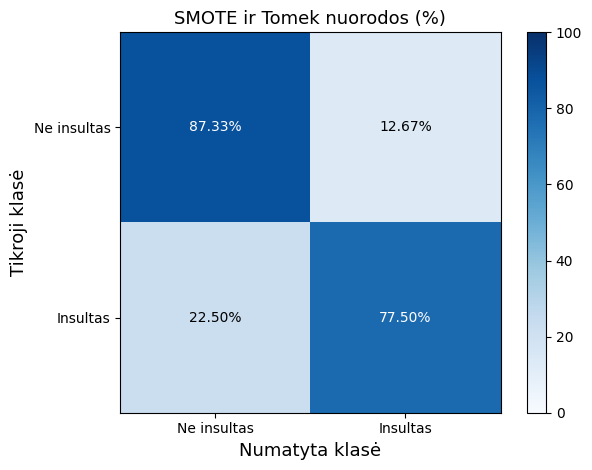

In [4]:
# Kryžminė validacija naudojant tik SMOTE ir Tomek nuorodas ir kryžminę validaciją

import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt

df = pd.read_csv('dataset_heart_reduced.csv', encoding='utf-8-sig')

X = df.drop(columns=['Širdies liga'])
y = df['Širdies liga']

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)


# 8. Create pipeline with SMOTE and MLP
pipeline = Pipeline([
    ('smote_tomek', SMOTETomek(sampling_strategy=0.99, random_state=7)),
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=7))
])

f1_scores = []
confusion_matrices = []

for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    pipeline.fit(X_train, y_train)
    test_preds = pipeline.predict(X_test)

    f1_scores.append(f1_score(y_test, test_preds))
    cm = confusion_matrix(y_test, test_preds)
    confusion_matrices.append(cm)


mean_cm = np.mean(confusion_matrices, axis=0)
cm_percentage = mean_cm.astype('float') / mean_cm.sum(axis=1)[:, np.newaxis] * 100

fig, ax = plt.subplots()
cax = ax.matshow(cm_percentage, cmap=plt.cm.Blues, vmin=0, vmax=100)  
plt.title('SMOTE ir Tomek nuorodos (%)', fontsize=13)
fig.colorbar(cax)

ax.set_xticks(np.arange(2))  
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Ne insultas', 'Insultas'], fontsize=10)
ax.set_yticklabels(['Ne insultas', 'Insultas'], fontsize=10)
ax.xaxis.set_ticks_position('bottom')

for (i, j), val in np.ndenumerate(cm_percentage):
    text_color = 'white' if val > 50 else 'black'
    ax.text(j, i, f'{val:.2f}%', ha='center', va='center', color=text_color, fontsize=10)

plt.xlabel("Numatyta klasė", fontsize=13)
plt.ylabel("Tikroji klasė", fontsize=13)
plt.tight_layout()
#plt.savefig("heart_smote_tomek_cross.png", dpi=300, bbox_inches='tight')
plt.show()


/Users/augustestriogaite/Downloads/Class_imbalance_MLP-main/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/augustestriogaite/Downloads/Class_imbalance_MLP-main/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/augustestriogaite/Downloads/Class_imbalance_MLP-main/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/augustestriogaite/Downloads/Class_imbalance_MLP-main/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691:

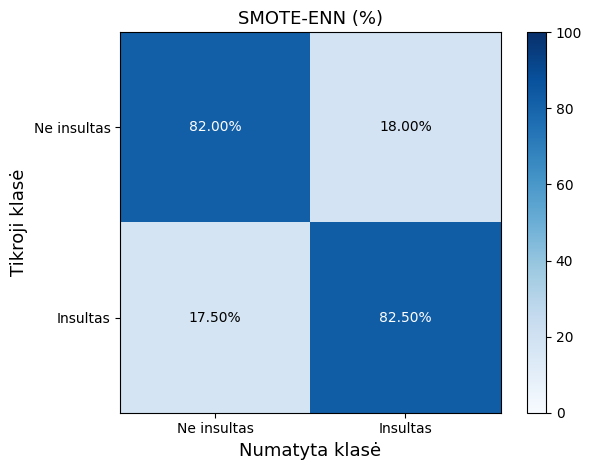

In [5]:
# Kryžminė validacija naudojant tik SMOTE-ENN ir kryžminę validaciją

import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

df = pd.read_csv('dataset_heart_reduced.csv', encoding='utf-8-sig')

X = df.drop(columns=['Širdies liga'])
y = df['Širdies liga']

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

pipeline = Pipeline([
    ('smote_enn', SMOTEENN(
        smote=SMOTE(k_neighbors=2, sampling_strategy=0.99, random_state=7),
        random_state=7
    )),
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=7))
])

f1_scores = []
confusion_matrices = []

for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    pipeline.fit(X_train, y_train)
    test_preds = pipeline.predict(X_test)

    f1_scores.append(f1_score(y_test, test_preds))
    cm = confusion_matrix(y_test, test_preds)
    confusion_matrices.append(cm)

mean_cm = np.mean(confusion_matrices, axis=0)
cm_percentage = mean_cm.astype('float') / mean_cm.sum(axis=1)[:, np.newaxis] * 100

fig, ax = plt.subplots()
cax = ax.matshow(cm_percentage, cmap=plt.cm.Blues, vmin=0, vmax=100)  
plt.title('SMOTE-ENN (%)', fontsize=13)
fig.colorbar(cax)

ax.set_xticks(np.arange(2))  
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Ne insultas', 'Insultas'], fontsize=10)
ax.set_yticklabels(['Ne insultas', 'Insultas'], fontsize=10)
ax.xaxis.set_ticks_position('bottom')

for (i, j), val in np.ndenumerate(cm_percentage):
    text_color = 'white' if val > 50 else 'black'
    ax.text(j, i, f'{val:.2f}%', ha='center', va='center', color=text_color, fontsize=10)

plt.xlabel("Numatyta klasė", fontsize=13)
plt.ylabel("Tikroji klasė", fontsize=13)
plt.tight_layout()
#plt.savefig("heart_smote_enn_cross.png", dpi=300, bbox_inches='tight')
plt.show()

/Users/augustestriogaite/Downloads/Class_imbalance_MLP-main/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/augustestriogaite/Downloads/Class_imbalance_MLP-main/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/augustestriogaite/Downloads/Class_imbalance_MLP-main/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/augustestriogaite/Downloads/Class_imbalance_MLP-main/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691:

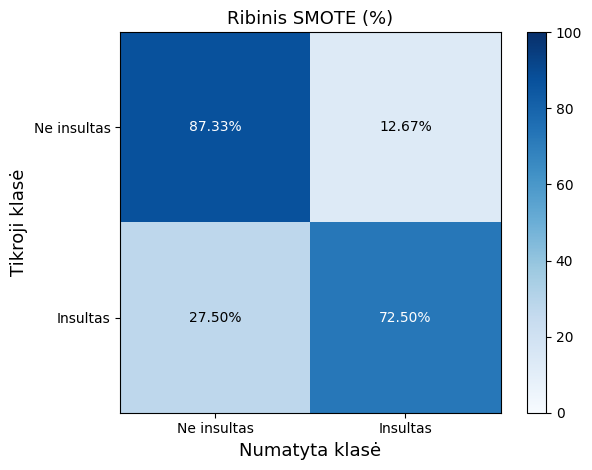

In [6]:
# Kryžminė validacija naudojant ribinį SMOTE ir kryžminę validaciją

import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
df = pd.read_csv('dataset_heart_reduced.csv', encoding='utf-8-sig')

X = df.drop(columns=['Širdies liga'])
y = df['Širdies liga']

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

pipeline = Pipeline([
    ('borderline_smote', BorderlineSMOTE(sampling_strategy=0.99, random_state=7)),
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=7))
])

f1_scores = []
confusion_matrices = []

for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    pipeline.fit(X_train, y_train)
    test_preds = pipeline.predict(X_test)

    f1_scores.append(f1_score(y_test, test_preds))
    cm = confusion_matrix(y_test, test_preds)
    confusion_matrices.append(cm)

mean_cm = np.mean(confusion_matrices, axis=0)
cm_percentage = mean_cm.astype('float') / mean_cm.sum(axis=1)[:, np.newaxis] * 100

fig, ax = plt.subplots()
cax = ax.matshow(cm_percentage, cmap=plt.cm.Blues, vmin=0, vmax=100) 
plt.title('Ribinis SMOTE (%)', fontsize=13)
fig.colorbar(cax)

ax.set_xticks(np.arange(2))  
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Ne insultas', 'Insultas'], fontsize=10)
ax.set_yticklabels(['Ne insultas', 'Insultas'], fontsize=10)
ax.xaxis.set_ticks_position('bottom')

for (i, j), val in np.ndenumerate(cm_percentage):
    text_color = 'white' if val > 50 else 'black'
    ax.text(j, i, f'{val:.2f}%', ha='center', va='center', color=text_color, fontsize=10)

plt.xlabel("Numatyta klasė", fontsize=13)
plt.ylabel("Tikroji klasė", fontsize=13)
plt.tight_layout()
#plt.savefig("heart_borderline_smote_cross.png", dpi=300, bbox_inches='tight')
plt.show()

/Users/augustestriogaite/Downloads/Class_imbalance_MLP-main/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


/Users/augustestriogaite/Downloads/Class_imbalance_MLP-main/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/augustestriogaite/Downloads/Class_imbalance_MLP-main/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/augustestriogaite/Downloads/Class_imbalance_MLP-main/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/augustestriogaite/Downloads/Class_imbalance_MLP-main/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691:

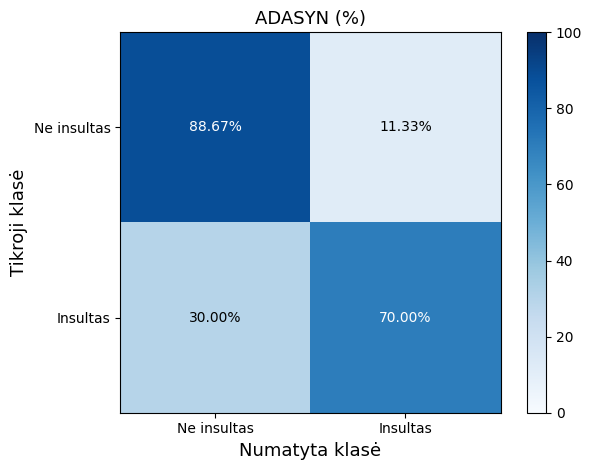

In [7]:
# Kryžminė validacija naudojant ADASYN ir kryžminę validaciją

import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import ADASYN
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
df = pd.read_csv('dataset_heart_reduced.csv', encoding='utf-8-sig')

X = df.drop(columns=['Širdies liga'])
y = df['Širdies liga']

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

pipeline = Pipeline([
    ('adasyn', ADASYN(sampling_strategy=0.99, random_state=7)),
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=7))
])

f1_scores = []
confusion_matrices = []

for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    pipeline.fit(X_train, y_train)
    test_preds = pipeline.predict(X_test)

    f1_scores.append(f1_score(y_test, test_preds))
    cm = confusion_matrix(y_test, test_preds)
    confusion_matrices.append(cm)

mean_cm = np.mean(confusion_matrices, axis=0)
cm_percentage = mean_cm.astype('float') / mean_cm.sum(axis=1)[:, np.newaxis] * 100


fig, ax = plt.subplots()
cax = ax.matshow(cm_percentage, cmap=plt.cm.Blues, vmin=0, vmax=100)  
plt.title('ADASYN (%)', fontsize=13)
fig.colorbar(cax)

ax.set_xticks(np.arange(2))  
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Ne insultas', 'Insultas'], fontsize=10)
ax.set_yticklabels(['Ne insultas', 'Insultas'], fontsize=10)
ax.xaxis.set_ticks_position('bottom')

for (i, j), val in np.ndenumerate(cm_percentage):
    text_color = 'white' if val > 50 else 'black'
    ax.text(j, i, f'{val:.2f}%', ha='center', va='center', color=text_color, fontsize=10)

plt.xlabel("Numatyta klasė", fontsize=13)
plt.ylabel("Tikroji klasė", fontsize=13)
plt.tight_layout()
# plt.savefig("heart_adasyn_cross.png", dpi=300, bbox_inches='tight')
plt.show()

/Users/augustestriogaite/Downloads/Class_imbalance_MLP-main/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/augustestriogaite/Downloads/Class_imbalance_MLP-main/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/augustestriogaite/Downloads/Class_imbalance_MLP-main/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/augustestriogaite/Downloads/Class_imbalance_MLP-main/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691:

Mean F1-score: 0.9006 ± 0.0337


/Users/augustestriogaite/Downloads/Class_imbalance_MLP-main/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


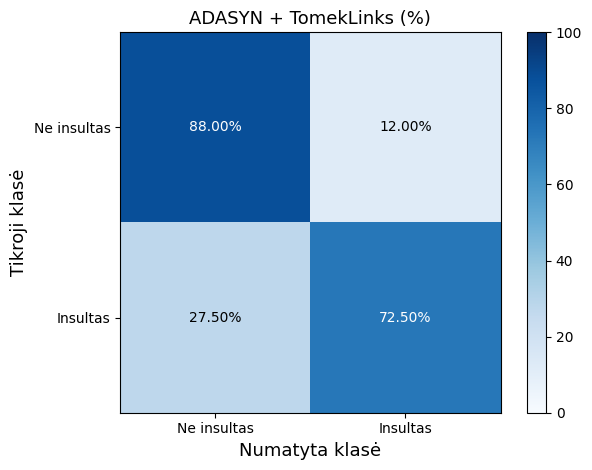

In [8]:
# Kryžminė validacija naudojant ADASYN ir Tomek nuorodas ir kryžminę validaciją

import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import TomekLinks
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
df = pd.read_csv('dataset_heart_reduced.csv', encoding='utf-8-sig')

X = df.drop(columns=['Širdies liga'])
y = df['Širdies liga']

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

pipeline = Pipeline([
    ('adasyn', ADASYN(sampling_strategy=0.99, random_state=7)),
    ('tomek', TomekLinks()),
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=7))
])

f1_scores = []
confusion_matrices = []

for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    pipeline.fit(X_train, y_train)
    test_preds = pipeline.predict(X_test)

    f1_scores.append(f1_score(y_test, test_preds))
    cm = confusion_matrix(y_test, test_preds)
    confusion_matrices.append(cm)

print(f"Mean F1-score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")

mean_cm = np.mean(confusion_matrices, axis=0)
cm_percentage = mean_cm.astype('float') / mean_cm.sum(axis=1)[:, np.newaxis] * 100

fig, ax = plt.subplots()
cax = ax.matshow(cm_percentage, cmap=plt.cm.Blues, vmin=0, vmax=100)
plt.title('ADASYN + TomekLinks (%)', fontsize=13)
fig.colorbar(cax)

ax.set_xticks(np.arange(2))
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Ne insultas', 'Insultas'], fontsize=10)
ax.set_yticklabels(['Ne insultas', 'Insultas'], fontsize=10)
ax.xaxis.set_ticks_position('bottom')

for (i, j), val in np.ndenumerate(cm_percentage):
    text_color = 'white' if val > 50 else 'black'
    ax.text(j, i, f'{val:.2f}%', ha='center', va='center', color=text_color, fontsize=10)

plt.xlabel("Numatyta klasė", fontsize=13)
plt.ylabel("Tikroji klasė", fontsize=13)
plt.tight_layout()
# plt.savefig("heart_adasyn_tomek_cross.png", dpi=300, bbox_inches='tight')
plt.show()
